In [1]:
# import re
# from tqdm.notebook import tqdm
import pandas as pd
import geopandas as gpd
import contextily as ctx

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)
# tqdm.pandas()

In [3]:
# !ls -1 data

In [4]:
ts = '2022-09-02_13-04'

In [5]:
df = (
    pd.read_excel(f'data/avito_{ts}.xlsx')
    .merge( pd.read_pickle(f'data/location/avito_{ts}_location.pkl'), on='adr')
)
print(len(df))
df.sample(3)[['title','adr','latitude','longitude','priceM']]

3763


,title,adr,latitude,longitude,priceM
2668,"1-к. квартира, 40 м², 9/10 эт.","улица Челнокова, 29 к1",44.59,33.43,10.00
311,"3-к. квартира, 76,5 м², 9/9 эт.","улица Токарева, 7 этап, блок-секция 1",44.58,33.51,10.33
1048,"2-к. квартира, 52 м², 4/5 эт.","проспект Октябрьской Революции, 87",44.59,33.46,7.90


In [6]:
gdf = gpd.GeoDataFrame( 
    df[['avito_id','title','adr','priceM','latitude','longitude']],
    geometry = gpd.points_from_xy(df['longitude'], df['latitude']),
    crs='epsg:4326', # WGS 84
)

gdf

,avito_id,title,adr,priceM,latitude,longitude,geometry
0,2468640267,"1-к. квартира, 53 м², 9/10 эт.","улица Генерала Крейзера, д. 8, корп. 5",8.47,44.60,33.51,POINT (33.51208 44.60449)
1,2468808200,"1-к. квартира, 75 м², 2/10 эт.","улица Генерала Крейзера, д. 8, корп. 5",11.31,44.60,33.51,POINT (33.51208 44.60449)
2,2468213388,"1-к. квартира, 60 м², 5/10 эт.","улица Генерала Крейзера, д. 8, корп. 5",9.03,44.60,33.51,POINT (33.51208 44.60449)
3,2468592830,"1-к. квартира, 75 м², 2/10 эт.","улица Генерала Крейзера, д. 8, корп. 5",11.31,44.60,33.51,POINT (33.51208 44.60449)
4,2468228513,"1-к. квартира, 67 м², 2/10 эт.","улица Генерала Крейзера, д. 8, корп. 5",10.08,44.60,33.51,POINT (33.51208 44.60449)
...,...,...,...,...,...,...,...
3758,2476129560,"1-к. квартира, 49 м², 2/10 эт.","проспект Античный, д. 26, корп. 5",8.10,44.59,33.44,POINT (33.43598 44.59412)
3759,2345689145,"2-к. квартира, 49 м², 2/2 эт.","1-я Бастионная улица , 7",7.30,44.61,33.55,POINT (33.55045 44.61291)
3760,2498033923,"3-к. квартира, 83 м², 1/8 эт.","улица Павла Корчагина, 5",13.90,44.58,33.43,POINT (33.43368 44.58335)
3761,2387854440,"3-к. квартира, 120 м², 1/1 эт.","СТ Рубин, 58",10.30,44.54,33.58,POINT (33.58460 44.54078)


KeyboardInterrupt: 

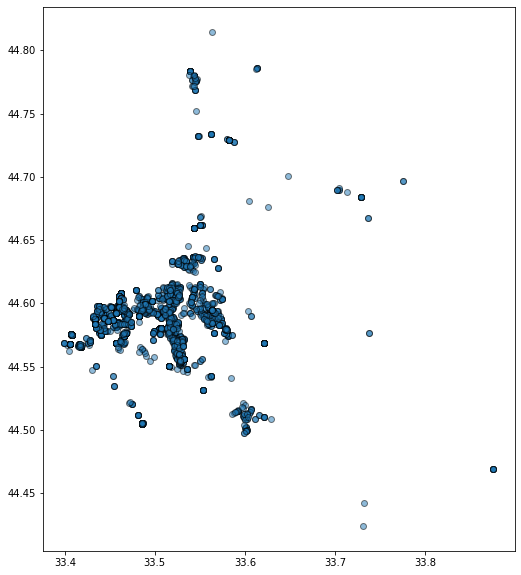

In [7]:
# ctx.add_basemap(
#     gdf.plot(figsize=(10,10), alpha=.5, edgecolor='k'), crs=gdf.crs, 
#     zoom=15,
#     # source=ctx.providers.Stamen.TonerLite, 
#     source=ctx.providers.OpenStreetMap.Mapnik,
# )

In [8]:
# gdf.plot()

In [9]:
from shapely.geometry import Polygon

# name = 'Севастополь, микрорайон Острякова'
# coo = pd.read_csv('data/frames/ostr.csv',header=None)

# name = 'Севастополь, парк 60-летия СССР'
# coo = pd.read_csv('data/frames/park60.csv',header=None)

name = 'Севастополь, Хрусталёва/Хрюкина'
coo = pd.read_csv('data/frames/hru.csv',header=None)

gdf_frames = gpd.GeoDataFrame(
        { 'name': [name,],},
        geometry=[ Polygon( coo[[1,0]].values ), ],
        crs='epsg:4326',
    )

# gdf_frames.plot()

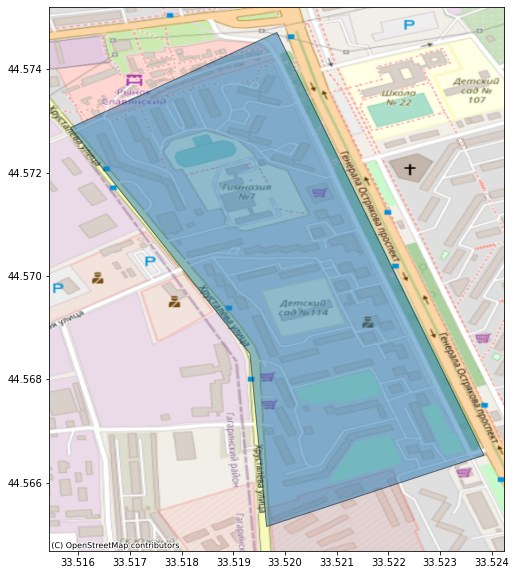

In [10]:
ctx.add_basemap(
    gdf_frames.plot(figsize=(10,10), alpha=.5, edgecolor='k'), crs=gdf.crs, 
    zoom=16,
    # source=ctx.providers.Stamen.TonerLite,
    source=ctx.providers.OpenStreetMap.Mapnik,

)

---

In [11]:
gdf_ = gdf.sjoin(gdf_frames, how='inner', predicate='within')
# gdf_.plot()

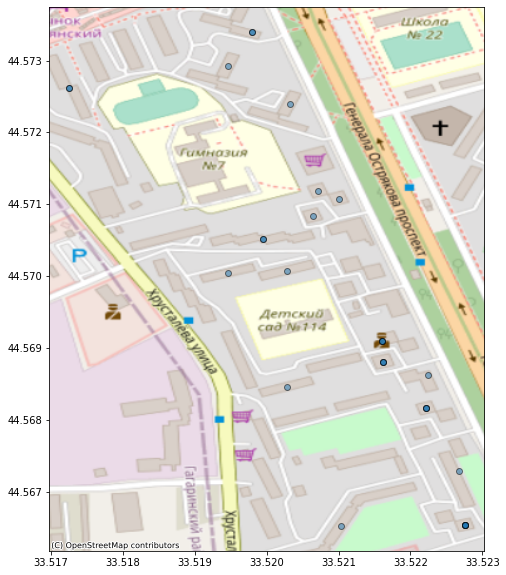

In [12]:
ctx.add_basemap(
    gdf_.plot(figsize=(10,10), alpha=.5, edgecolor='k'), 
    crs=gdf.crs, 
    zoom=16,
    #source=ctx.providers.Stamen.TonerLite, 
    source=ctx.providers.OpenStreetMap.Mapnik,
)

In [13]:
gdf_[['priceM']].describe().T

,count,mean,std,min,25%,50%,75%,max
priceM,31.00,7.45,1.89,4.20,6.30,7.70,8.47,13.00


---

In [14]:
# ctx.providers.Stamen.Watercolor
# ctx.providers.Stamen.TonerLabels
# ctx.providers.Stamen.TonerLite
# ctx.providers.OpenStreetMap.BlackAndWhite

---

In [15]:
from folium import Map
from folium.features import GeoJson
from folium.plugins import HeatMap

In [16]:
gjson = gdf_.to_json()

start_pos = (44.578330, 33.516509)

Map( start_pos, zoom_start=14, ).add_child( GeoJson(gjson) )
# Map( start_pos, zoom_start=14, ).add_child( gdf_[['latitude','longitude',]].values )

In [ ]:
# Map(
#     location=start_pos,
#     zoom_start=15,
# ).add_child( 
#     HeatMap( gdf_[['latitude','longitude',]],radius=12.,min_opacity=3. )
# )


---

In [ ]:
# df_ = df.query(
#     '~(is_studio|is_apartment|is_part|is_auction|is_openspace|is_SNT|is_roof)'
#     '&(nrooms==2)'
# )

# df_[['priceM']].describe().T    

In [ ]:
# cols = ['adr', 'priceM', 'nrooms', 'floor', 'nfloors', 'area', 'description', 'avito_id',]
# df_[cols].sort_values(by=['priceM'])[:20]